In [1]:
from spectral_cube import SpectralCube
from pvextractor import extract_pv_slice, Path
#import pylab as pl
import numpy as np
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs
from matplotlib.colors import LogNorm
from astropy.visualization.stretch import SinhStretch
from astropy.visualization import simple_norm
import matplotlib.pyplot as plt
from astropy.utils import data

fatal: detected dubious ownership in repository at '/blue/adamginsburg/adamginsburg/repos/dask'
To add an exception for this directory, call:

	git config --global --add safe.directory /blue/adamginsburg/adamginsburg/repos/dask


In [ ]:
ls /home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/

In [ ]:
ls /home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/

In [ ]:
ls /home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/

In [ ]:
ls /home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/

## Read in Data and Load into Memory

In [2]:
a_fitsnames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.Ha.spw19.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.HC3N.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.H2CO.spw23.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.13CO.spw29.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/fitsImages/g5a.C18O.spw31.fits' 
               ]

b_fitsnames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.Ha.spw19.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.HC3N.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.H2CO.spw23.fits',  
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.13CO.spw29.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/fitsImages/g5b.C18O.spw31.fits'
               ]

In [3]:
'''
a_fixednames =['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.Ha.spw19.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw23.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.13CO.spw29.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.C18O.spw31.fits' 
               ]

b_fixednames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.Ha.spw19.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw23.fits',  
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.13CO.spw29.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.C18O.spw31.fits'
               ]
'''
####

"\na_fixednames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.12CO.spw17.fits', \n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.Ha.spw19.fits', \n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.CH3OH.spw21.fits',\n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw23.fits', \n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw25.fits', \n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.SiO.spw27.fits', \n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.13CO.spw29.fits', \n               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862

In [3]:
def spec_cube(name):
    cube = SpectralCube.read(name)
    cube.allow_huge_operations=True
    cube = cube.with_spectral_unit(u.km / u.s, velocity_convention='radio')
    cube = cube.to(u.K)
    return cube

def spec_mcube(name):
    cube = SpectralCube.read(name)
    cube.allow_huge_operations=True
    cube = cube.with_spectral_unit(u.GHz, velocity_convention='radio', rest_value=218.44005 * u.GHz)
    cube = cube.with_spectral_unit(u.km / u.s, velocity_convention='radio')
    cube = cube.to(u.K)
    return cube

In [4]:
a_cube17 = spec_cube(a_fitsnames[0])
a_cube17 = np.flip(a_cube17, 0)
#a_cube19 = spec_cube(a_fitsnames[1])
a_cube21 = spec_mcube(a_fitsnames[2])
a_cube23 = spec_cube(a_fitsnames[3])
a_cube25 = spec_cube(a_fitsnames[4])
a_cube27 = spec_cube(a_fitsnames[5])
a_cube29 = spec_cube(a_fitsnames[6])
a_cube31 = spec_cube(a_fitsnames[7])

In [5]:
b_cube17 = spec_cube(b_fitsnames[0])
b_cube17 = np.flip(b_cube17, 0)
#b_cube19 = spec_cube(b_fitsnames[1])
b_cube21 = spec_mcube(b_fitsnames[2])
b_cube23 = spec_cube(b_fitsnames[3])
b_cube25 = spec_cube(b_fitsnames[4])
b_cube27 = spec_cube(b_fitsnames[5])
b_cube29 = spec_cube(b_fitsnames[6])
b_cube31 = spec_cube(b_fitsnames[7])

In [10]:
#a_cube21 = spec_mcube(a_fitsnames[2])
#b_cube21 = spec_mcube(b_fitsnames[2])


## Make Example PV Diagrams and Moment Maps to Identify Issues

/home/savannahgramze/.local/lib/python3.9/site-packages/pvextractor-0.3.dev33+gac7db5e-py3.9.egg/pvextractor/geometry/path.py:262: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.append(MPLPolygon(list(zip(poly.x, poly.y)), **kwargs))


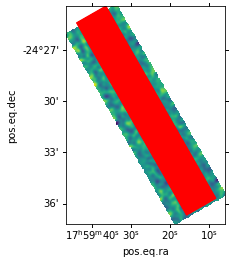

In [11]:
apath = Path([(29, 248),(160,19)], width=40.)
#Path([(2,18),(155,18)], width = 25.)
ax = plt.subplot(111, projection=a_cube23.wcs.celestial)
ax.imshow(a_cube23[25].value)
apath.show_on_axis(ax, spacing=1, color='r')

/home/savannahgramze/.local/lib/python3.9/site-packages/pvextractor-0.3.dev33+gac7db5e-py3.9.egg/pvextractor/geometry/path.py:262: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.append(MPLPolygon(list(zip(poly.x, poly.y)), **kwargs))


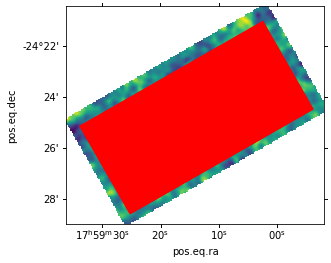

In [8]:
bpath = Path([(30, 42),(175,125)], width=80.)
ax = plt.subplot(111, projection=b_cube21.wcs.celestial)
ax.imshow(b_cube21[25].value)
bpath.show_on_axis(ax, spacing=1, color='r')

In [8]:
def plot_pv(cube, path, aspect):
    pvdiagram = extract_pv_slice(cube=cube, path=path, spacing=1)
    
    plt.figure(figsize=(12,6))

    #ax = plt.subplot(111, projection=wcs.WCS(pvdiagram.header))
    #im = ax.imshow(pvdiagram.data)
    #cb = plt.colorbar(mappable=im)

    ww = wcs.WCS(pvdiagram.header)
    
    norm = simple_norm(pvdiagram.data, 'asinh')

    ax = plt.subplot(111, projection=ww)
    im = ax.imshow(pvdiagram.data, norm=norm, cmap='afmhot')#, norm=LogNorm())
    #im = ax.imshow(pvdiagram.data, norm=norm, cmap='plasma')#, norm=LogNorm())
    cb = plt.colorbar(mappable=im)
    #cb.set_label("Brightness Temperature [K]")
    cb.set_label(cube.unit)
    ax.set_aspect(aspect)

    ax0 = ax.coords[0]
    ax0.set_format_unit(u.arcmin)
    ax1 = ax.coords[1]
    ax1.set_format_unit(u.km/u.s)

    ax.set_ylabel("Velocity [km/s]")
    ax.set_xlabel("Offset [arcmin]")
    return ax

In [13]:
#plot_pv(a_cube17,apath,0.2)

In [15]:
#plot_pv(a_cube21,apath,0.5)

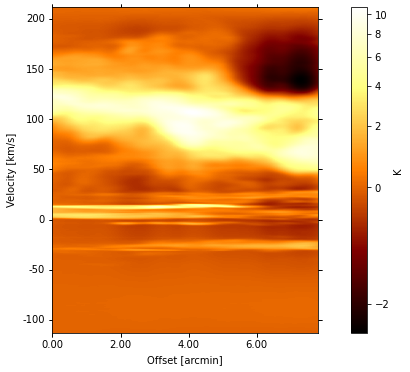

In [23]:
plot_pv(b_cube17,bpath,0.1)

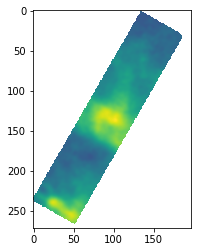

In [36]:
a_cube17.moment0(axis=0).quicklook()  

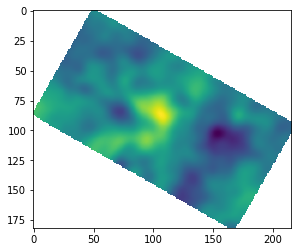

In [18]:
b_cube17.moment0(axis=0).quicklook()  

## Subtract Off Bottom 10 Percentile of Cubes

In [6]:
def per10_subtraction(cube):
    return per_subtraction(cube, 10)

def per_subtraction(cube, per):
    percentile_10 = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio').percentile(per,axis=(1,2))
    #percentile_10.quicklook()
    #print(percentile_10.shape)
    plt.plot(percentile_10.filled_data[:].value, percentile_10.spectral_axis)
    plt.xlabel('K')
    plt.ylabel('km/s')
    per10_subtracted = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio') - percentile_10[:,None,None]
    return per10_subtracted

In [128]:
a_cube21.percentile??

Signature: a_cube21.percentile(q, axis=None, iterate_rays=False, **kwargs)
Source:   
    def percentile(self, q, axis=None, iterate_rays=False, **kwargs):
        """
        Return percentiles of the data.

        Parameters
        ----------
        q : float
            The percentile to compute
        axis : int, or None
            Which axis to compute percentiles over
        iterate_rays : bool
            Iterate over individual rays?  This mode is slower but can save RAM
            costs, which may be extreme for large cubes
        """
        if hasattr(np, 'nanpercentile') and not iterate_rays:
            result = self.apply_numpy_function(np.nanpercentile, q=q,
                                               axis=axis, projection=True,
                                               unit=self.unit, how='cube',
                                               **kwargs)
        else:
            result = self.apply_function(np.percentile, q=q, axis=axis,
                 

#### Field A 

In [16]:
#a_cube17.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.12CO.spw17.fits')

In [20]:
#percentile_21_10 = a_cube21.with_spectral_unit(u.km/u.s, velocity_convention='radio').percentile(10,axis=(1,2))
#percentile_21_10.quicklook() # subtract off
#per10_21_subtracted = a_cube21.with_spectral_unit(u.km/u.s, velocity_convention='radio') - percentile_21_10[:,None,None]

In [21]:
#per10_21_subtracted.mad_std()

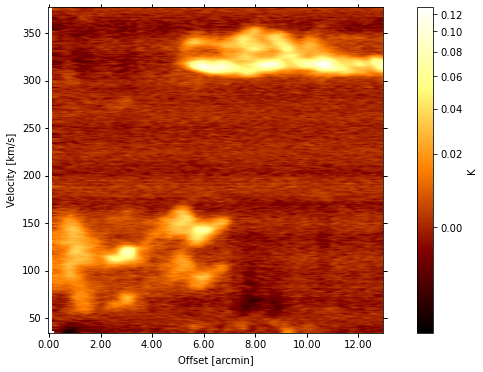

In [8]:
plot_pv(a_cube21,apath,0.5)

In [91]:
n_21 = 10

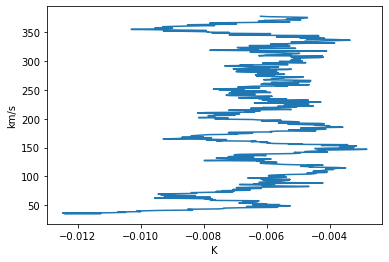

In [30]:
per10sub_21 = per_subtraction(a_cube21, 10)


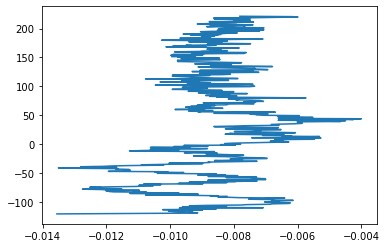

In [30]:
#percentile_10
spec = a_cube23.with_spectral_unit(u.km/u.s, velocity_convention='radio').percentile(5,axis=(1,2))
plt.plot(spec.filled_data[:].value, spec.spectral_axis)
#spec = #a_cube23[:,0,0]
#spec.quicklook()

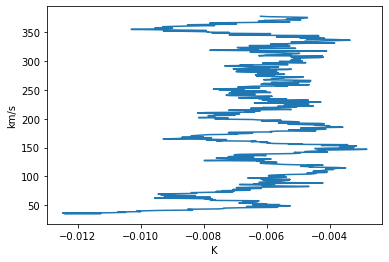

In [97]:
per10sub_21 = per_subtraction(a_cube21, 10)

In [ ]:
a_cube21[:,:,50].quicklook

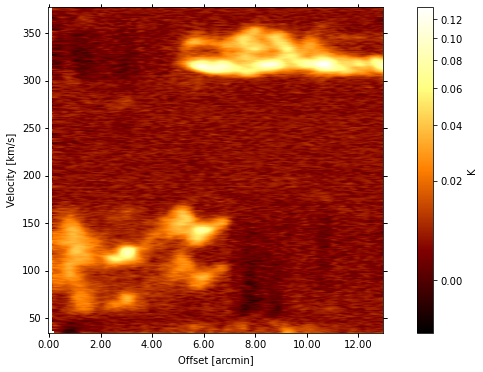

In [10]:
plot_pv(per10sub_21,apath,0.5)
#plt.savefig('plots/pvdiagram_CH3OH.png')

In [55]:
#per10sub_21.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.CH3OH.spw21.fits')

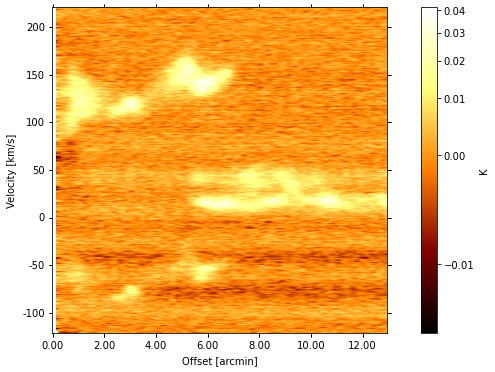

In [12]:
ax0 = plot_pv(a_cube23,apath,0.5)

In [92]:
n_23 = 5

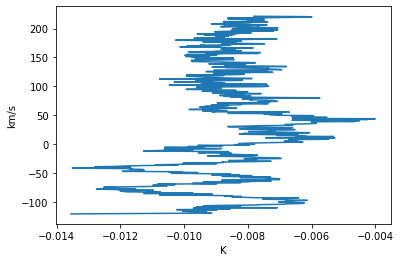

In [13]:
per5sub_23 = per_subtraction(a_cube23, 5)
#per10sub_23 = per_subtraction(a_cube23, 10)

#plot_pv(per10sub_17,apath,0.1)

<WCSAxesSubplot:xlabel='Offset [arcmin]', ylabel='Velocity [km/s]'>

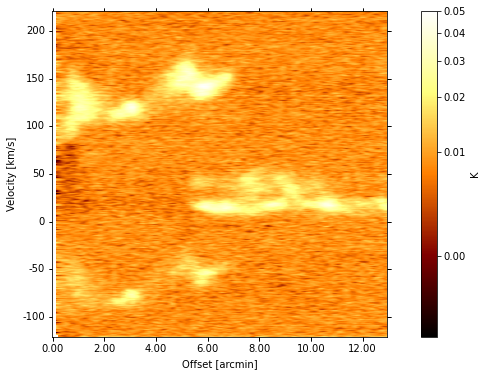

In [14]:
plot_pv(per5sub_23, apath, 0.5)
#plt.savefig('plots/pvdiagram_H2CO_spw23.png')

In [76]:
pvdiagram_bef = extract_pv_slice(cube=a_cube23, path=apath, spacing=1)
pvdiagram_aft = extract_pv_slice(cube=per5sub_23-0.0085*u.K, path=apath, spacing=1)

In [16]:
#ax2.set_ybound??

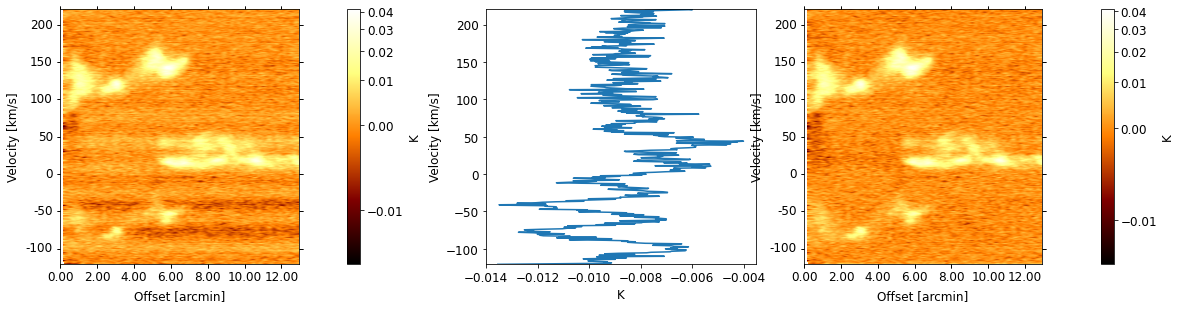

In [85]:
plt.figure(figsize=(16,12), layout="constrained")
plt.rcParams.update({'font.size': 12})

#plt.subplot(331)

# equivalent but more general
#ax1 = plt.subplot(2, 2, 1)

# add a subplot with no frame
ax1 = plt.subplot(331, projection=wcs.WCS(pvdiagram_bef.header))
norm = simple_norm(pvdiagram_bef.data, 'asinh')#, min_cut=0, max_cut=np.nanmax(pvdiagram_aft.data))
im = ax1.imshow(pvdiagram_bef.data, norm=norm, cmap='afmhot')
cb1 = plt.colorbar(mappable=im, pad=-0.01)
cb1.set_label(a_cube23.unit)
#axis0x = ax1.coords[0].set_format_unit(u.arcmin)
ax1.coords[0].set_format_unit(u.arcmin)
#axis1x = ax1.coords[1]
ax1.coords[1].set_format_unit(u.km/u.s)
ax1.set_aspect(0.55)
ax1.set_ylabel("Velocity [km/s]")
ax1.set_xlabel("Offset [arcmin]")

ax2 = plt.subplot(332)
ax2.plot(spec.filled_data[:].value, spec.spectral_axis)
ax2.set_xlabel('K')
ax2.set_ylabel('Velocity [km/s]')
ax2.set_ybound(upper=np.max(spec.spectral_axis).value, lower=np.min(spec.spectral_axis).value)

ax3 = plt.subplot(333, projection=wcs.WCS(pvdiagram_aft.header))
norm = simple_norm(pvdiagram_aft.data, 'asinh')#, min_cut=0, max_cut=np.nanmax(pvdiagram_aft.data))
im = ax3.imshow(pvdiagram_aft.data, norm=norm, cmap='afmhot')
cb3 = plt.colorbar(mappable=im, pad=-0.01)
cb3.set_label(per5sub_23.unit)
#axis0x = ax1.coords[0].set_format_unit(u.arcmin)
ax3.coords[0].set_format_unit(u.arcmin)
#axis1x = ax1.coords[1]
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_aspect(0.55)
ax3.set_ylabel("Velocity [km/s]")
ax3.set_xlabel("Offset [arcmin]")

#ax3 = plt.subplot(322)

#fig, axs = plt.subplots(1, 3)
#axs[0] = plt.subplot(111)
plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/persubtraction.pdf', bbox_inches='tight')

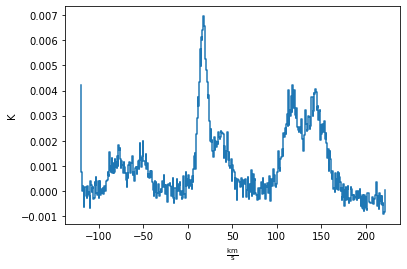

In [75]:
(a_cube23 - spec[:,None,None]-0.0085*u.K).mean(axis=(1,2)).quicklook()

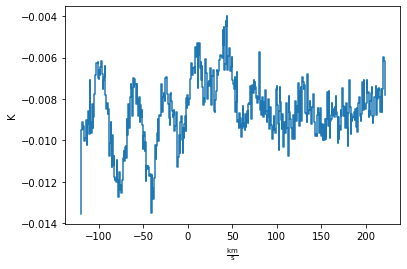

In [72]:
spec.quicklook()

In [61]:
np.nanmin(pvdiagram_bef.data)

-0.013754315423357082

In [60]:
np.nanmax(pvdiagram_aft.data)

0.05025954115792411

In [57]:
#per5sub_23.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw23.fits')

In [93]:
n_25 = 1

In [27]:
plot_pv(a_cube23, apath, 0.5)

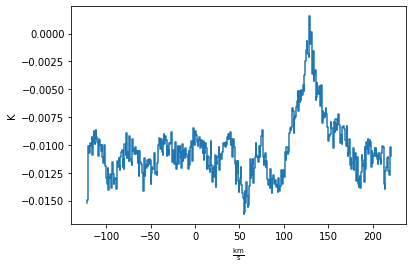

In [45]:
per10sub_25 = per_subtraction(a_cube25, 1)

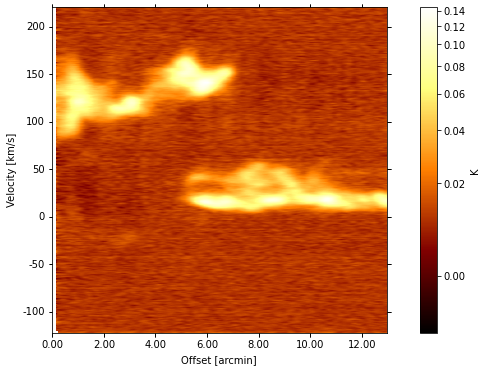

In [53]:
plot_pv(per10sub_25, apath, 0.5)
#plt.savefig('plots/pvdiagram_H2CO_spw25.png')

In [59]:
#per10sub_25.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw25.fits')

In [30]:
#plot_pv(a_cube25, apath, 0.5)

In [94]:
n_27 = 5

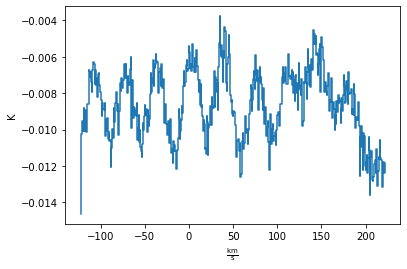

In [22]:
per10sub_27 = per_subtraction(a_cube27, 5)

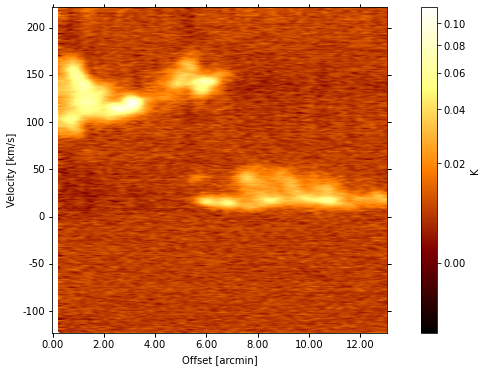

In [23]:
plot_pv(per10sub_27, apath, 0.5)
#plt.savefig('plots/pvdiagram_SiO.png')

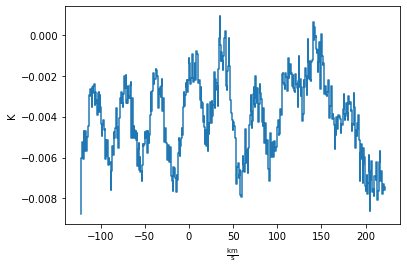

In [26]:
per10sub_27dot = per_subtraction(a_cube27, 20)

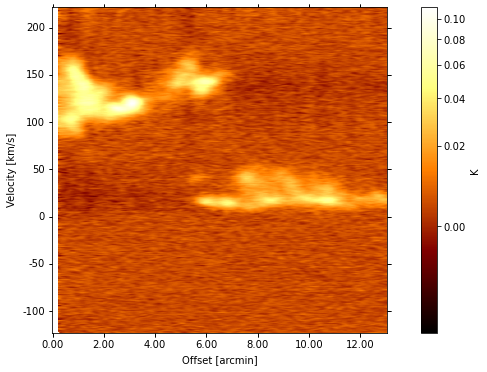

In [27]:
plot_pv(per10sub_27dot, apath, 0.5)


In [28]:
#per10sub_27.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.SiO.spw27.fits')#,overwrite=True)

In [33]:
#plot_pv(a_cube27, apath, 0.5)

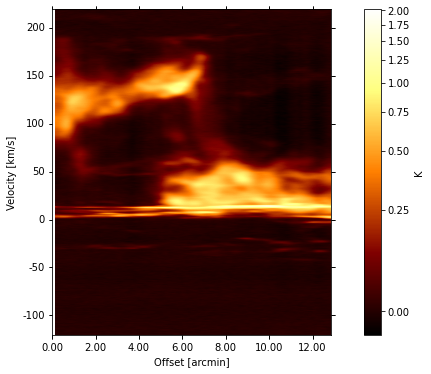

In [61]:
plot_pv(a_cube29, apath, 0.3)
#plt.savefig('plots/pvdiagram_13CO.pdf')
#plt.savefig('plots/pvdiagram_13CO.png')

In [17]:
#a_cube29.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.13CO.spw29.fits')

In [34]:
#plot_pv(a_cube31, apath, 0.2)

In [95]:
n_31 = 1

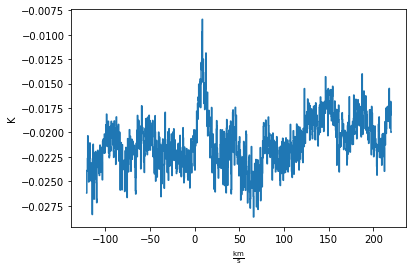

In [55]:
per10sub_31 = per_subtraction(a_cube31, 1)

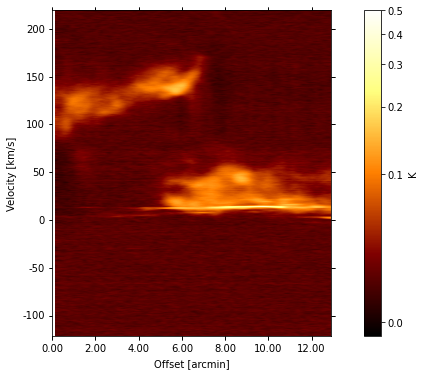

In [59]:
plot_pv(per10sub_31, apath, 0.3)
#plt.savefig('plots/pvdiagram_C18O.pdf')
#plt.savefig('plots/pvdiagram_C18O.png')

In [62]:
#per10sub_31.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.C18O.spw31.fits')

#### Field B

In [7]:
#b_cube17.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.12CO.spw17.fits')

In [37]:
#plot_pv(b_cube21,bpath,0.4)

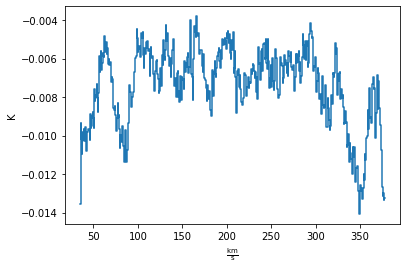

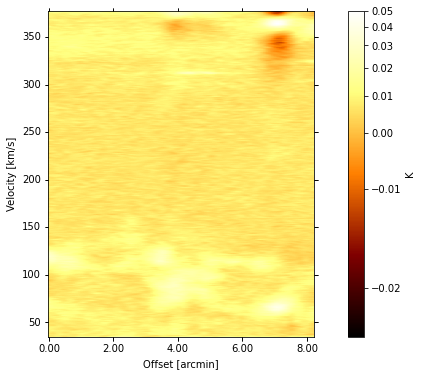

In [38]:
per10sub_21b = per_subtraction(b_cube21, 10)
plot_pv(per10sub_21b,bpath,0.4)

In [63]:
#per10sub_21b.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.CH3OH.spw21.fits')

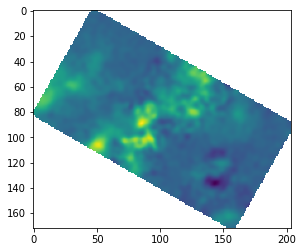

In [39]:
per10sub_21b.moment0().quicklook()

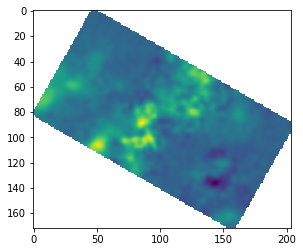

In [40]:
b_cube21.moment0().quicklook()

In [41]:
#plot_pv(b_cube23,bpath,0.4)

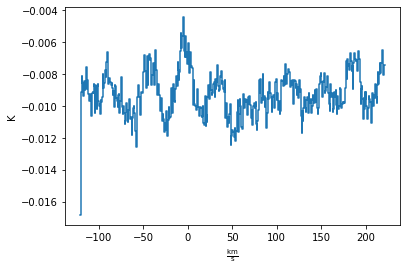

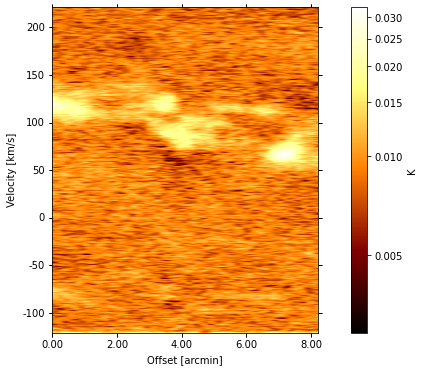

In [42]:
per10sub_23b = per_subtraction(b_cube23, 5)
plot_pv(per10sub_23b,bpath,0.4)

In [64]:
#per10sub_23b.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw23.fits')

In [43]:
#plot_pv(b_cube25,bpath,0.4)

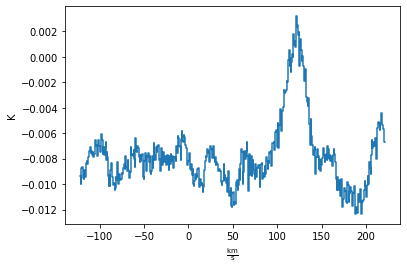

In [44]:
#per10sub_25b = per_subtraction(b_cube25, 10)

per10sub_25b = per_subtraction(b_cube25, 5)


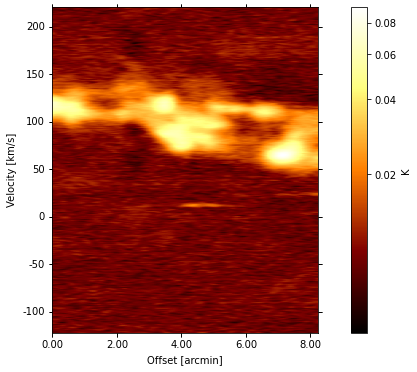

In [45]:
plot_pv(per10sub_25b,bpath,0.4)

In [65]:
#per10sub_25b.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw25.fits')

In [90]:
#plot_pv(b_cube27,bpath,0.4)


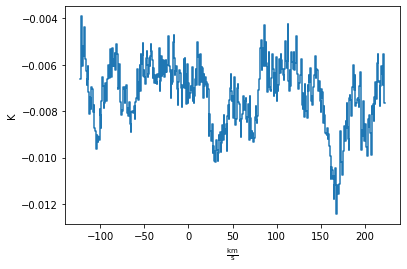

In [47]:
per10sub_27b = per_subtraction(b_cube27, 10)


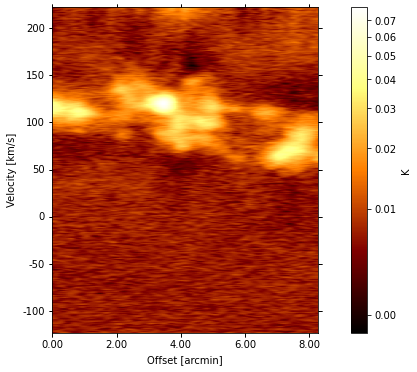

In [48]:
plot_pv(per10sub_27b,bpath,0.4)

In [66]:
#per10sub_27b.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.SiO.spw27.fits')

In [49]:
#plot_pv(b_cube29,bpath,0.2)

In [50]:
#plot_pv(b_cube31,bpath,0.2)

In [8]:
#b_cube29.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.13CO.spw29.fits')

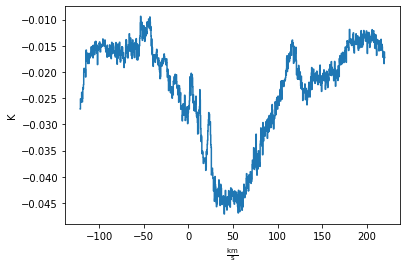

In [51]:
per10sub_31b = per_subtraction(b_cube31, 5)


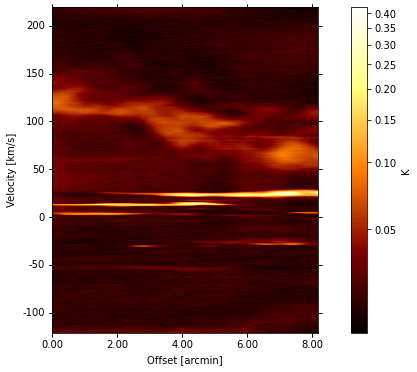

In [52]:
plot_pv(per10sub_31b,bpath,0.2)

In [67]:
#per10sub_31b.write('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.C18O.spw31.fits')

In [87]:
from astropy.table import QTable
import astropy.units as u
import numpy as np

In [86]:
adj21 = 0.006 * u.K
adj23 = 0.0085 * u.K
adj25 = 0.011 * u.K
adj27 = 0.0124 * u.K
adj31 = 0.0215 * u.K

In [98]:
spw = [ #'\ce{^12CO} $J=2\shortrightarrow1$',
        #'H(30)$\alpha$',
        '\ce{HC3N} v=0 $J=24\shortrightarrow23$',
        '\ce{H2CO} $J=3_{2,2}\shortrightarrow2_{2,1}$',
        '\ce{H2CO} $J=3_{0,3}\shortrightarrow2_{0,2}$',
        'SiO v=0 $J=5\shortrightarrow4$',
        #'\ce{^13CO} $J=2\shortrightarrow1$',
        '\ce{C^18O} $J=2\shortrightarrow1$']
ns = [n_21, n_23, n_25, n_27, n_31]
adj = [adj21,
        adj23,
        adj25,
        adj27,
        adj31]
names = ['Molecule and Transition', 'Percentile Subtracted', 'Vertical Shift']

In [100]:
QTable([spw, ns, adj], names=names).write('persub.txt', format='latex')